id                            16.000000
pos_x                         34.994173
pos_y                        136.967783
pos_z                          1.000000
lora_network_addr           1880.000000
activation_time               60.000000
connection_interval          600.000000
total_energy_consumption       0.079780
lora_energy_consumption        0.030144
ble_energy_consumption         0.049636
dtype: float64
2.6327529999999997


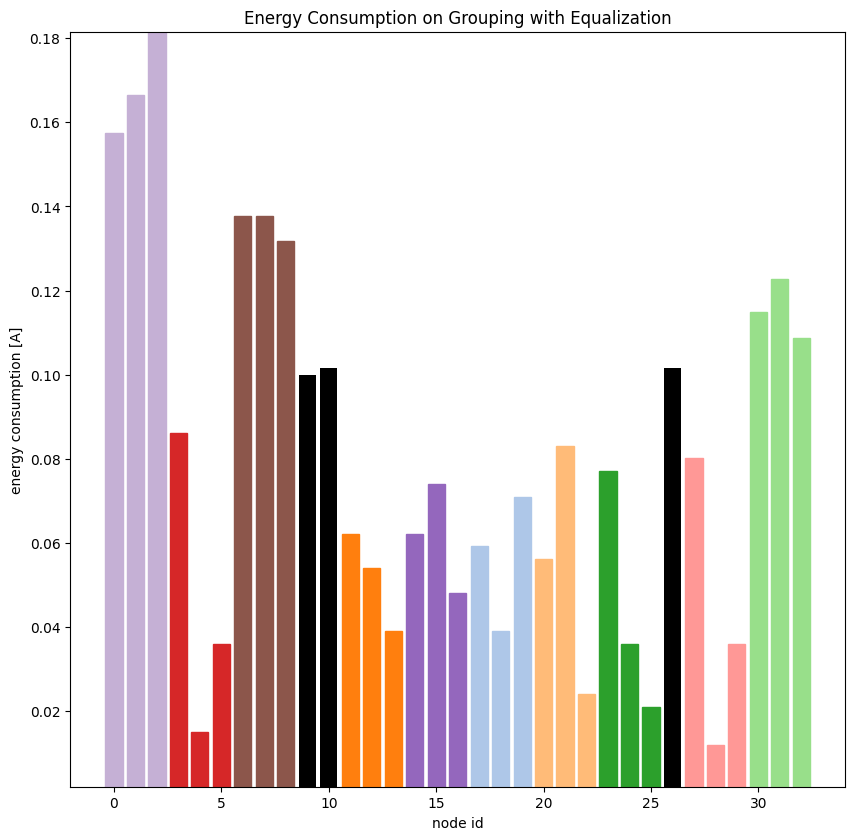

In [96]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import dataclasses
import copy
import datetime
import operator

@dataclasses.dataclass
class NodeData:
    id: int
    pos_x: float
    pos_y: float
    pos_z: float
    lora_network_addr: str
    ble_network_addr: str
    activation_time: float
    connection_interval: float
    total_energy_consumption: float
    lora_energy_consumption: float
    ble_energy_consusmption: float

@dataclasses.dataclass
class GroupPair:
    id: int
    my_addr: int
    lora_net_addr: int

def removeDuplicates(lst): 
    return [t for t in (set(tuple(i) for i in lst))] 

group_csv_file = "/Users/tozastation/workspace/tozastation/simulate-lorawan/result/20200504_154542_group_log.csv"
node_datas = []
node_data_csv = pd.read_csv(group_csv_file)
# print(node_data_csv)
print(node_data_csv.mean())
group_pair_csv_file = "/Users/tozastation/workspace/tozastation/simulate-lorawan/result/20200504_154542_group_pair.csv"
group_pairs = []
group_pair_csv = pd.read_csv(group_pair_csv_file)
#
#df_sorted = node_data_csv.sort_values('total_energy_consumption',ascending=False)
for index, row in node_data_csv.iterrows():
    node = NodeData(
        int(row[0]), 
        round(float(row[1]), 6),
        round(float(row[2]), 6),
        round(float(row[3]), 6),
        row[4],
        row[5],
        round(float(row[6]), 6),
        round(float(row[7]), 6),
        round(float(row[8]), 6),
        round(float(row[9]), 6),
        round(float(row[10]), 6)
    )
    node_datas.append(node)
#
for index, row in group_pair_csv.iterrows():
    group_pair = GroupPair(
        int(row[0]), 
        int(row[1]),
        row[2]
    )
    group_pairs.append(group_pair)
#
fig_e = plt.figure(figsize=(10, 10), dpi=100)
ax_e  = fig_e.add_subplot(111)
ax_e.set_title("Total Current Consumption on Grouping with Equalization")
ax_e.set_xlabel("node id")
ax_e.set_ylabel("current [A]")
min:float = node_datas[0].total_energy_consumption
max:float = node_datas[0].total_energy_consumption
total:float = 0.0
for node_data in node_datas:
    total = total + node_data.total_energy_consumption
    if min > node_data.total_energy_consumption: min = node_data.total_energy_consumption
    if max < node_data.total_energy_consumption: max = node_data.total_energy_consumption
ax_e.set_ylim(min-0.01, max)
print(total)
bar_list  = ax_e.bar('id', 'total_energy_consumption', data=node_data_csv, color='black')
#
groups = []
for group_pair in group_pairs:
    base_id = group_pair.id
    col     = []
    col.append(base_id)
    for b in group_pairs:
        if base_id == b.id:
            for c in group_pairs:
                if (b.lora_net_addr == c.my_addr) and (b.id != c.id):
                    col.append(c.id)
    groups.append(set(col))

sorted_list = removeDuplicates(groups)
colorlist = ["darkred", "saddlebrown", "darkslategrey", "darkviolet", "teal", "deepskyblue", "navy", "yellow", "thistle", "crimson", "tan", "steelblue"]

new_list = []
cmap = plt.get_cmap("tab20")
for i, l in enumerate(sorted_list):
    if len(l) > 2:
        for m in l:
            for j, node_data in enumerate(node_datas):
                if m==node_data.id:
                    new_list.append((m, j))
                    bar_list[j].set_color(cmap(i))

plt.show()

# file_prefix = datetime.datetime.now().isoformat()
# file_name = file_prefix + "_group_consumption.png"
# fig_e.savefig("/Users/tozastation/workspace/tozastation/simulate-lorawan/output/" + file_name)